In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os
import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
#from analyze_cell import analyze_cell
#from line_segment_features import line_segment_features
from matplotlib.patches import Circle
from ImageFeatures import ImageFeatures
from Functions import label_image, FeaturesFromCentroid, cv2toski,pylsdtoski,init_import,polar_to_cartesian, truncate_colormap, plot_hist, plot_pie, remove_not1D, quantitative_analysis,hist_bin,hist_lim,create_separate_DFs,branch,graphAnalysis
from fractal_dimension import fractal_dimension
from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC
from skimage.filters import apply_hysteresis_threshold


print('📚')

C:\Users\diogo\AppData\Roaming\Python\Python37\site-packages\nose\importer.py:12: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import find_module, load_module, acquire_lock, release_lock


📚


In [2]:
global OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF
OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF = init_import()  # Import Images, add to DataFrame
Centroids = pickle.load(open('Centroids.p', 'rb'))
TextureDF = pd.read_pickle(os.getcwd() + "\\TextureDF.pkl")   
dir_masks = os.getcwd() + str("//nuclei_masks")
ROIs      = pickle.load(open('ROIs.p', 'rb'))
ResultsDF = pd.read_pickle(".//ResultsDF_LSD_Last2.p")
LSF,DCF,DNF,SKNW,OTHERS,FULL = create_separate_DFs(ResultsDF)
data = pd.concat([ResultsDF[ResultsDF.columns[:7]] , FULL],axis=1)

print('🌠')

🌠


In [5]:
def get_centroid_again(ResultsRow):
    centroids = Centroids[ResultsRow['Img Index']]
    x_,y_   = np.where((ResultsRow['Mask']*1) != 0)

    # GET and PLOT centroid
    global centroid_list,centroid
    centroid_list = []

    # GET: centroid inside ROI indexes
    for idx,row in centroids.iterrows():
        if (round(row['Centroid'][0]),round(row['Centroid'][1])) in list(zip(x_,y_)): 
            centroid_list += [idx]
    if centroid_list == []:  print("Error: No centroids within ROI"); return 0,0,0,0,0,0;
    if len(centroid_list) > 1: print("Warning: More than 1 centroid identified within ROI");

    # PLOT: first centroid identified and nucleus contour
    centroid = centroids.loc[centroid_list[0]]['Centroid']
    
    return centroid

get_centroid_again(data.loc[0])

(192.13609172482552, 848.8659022931206)

In [31]:
np.linspace(0,90,91)[:10]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [26]:
res = []

for index,row in data.iterrows():
    res += [get_centroid_again(row)]
    
data['Nucleus Centroid'] = res

Error: No centroids within ROI
Error: No centroids within ROI


In [ ]:
temp['LSF:RSpos'] = [x[2] for x in res]

resu = []
i = 0
for i in range(len(temp['LSF:RSpos'])):
    nc = temp['Nucleus Centroid'][i]
    rs = temp['LSF:RSpos'][i]
    resu += [np.sqrt((nc[0]-rs[0])**2 + (nc[1]-rs[1])**2)]
    
temp['LSF:RS-NucCent Distance'] = resu

In [34]:
imege = data.loc[0]['Patches'][1]
imege = cv2.convertScaleAbs(imege)
(x, y), (MA, ma), angle = cv2.fitEllipse(imege)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:355: error: (-215:Assertion failed) n >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::fitEllipseNoDirect'


EXPERIÊNCIAS

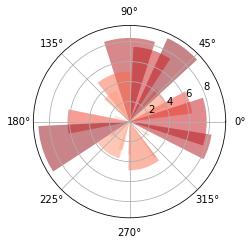

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.Reds(r / 10.0))
    bar.set_alpha(0.5)
plt.show()

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
#                 divider = make_axes_locatable(ax[0,0])
#                 cax = divider.append_axes("right", size="5%", pad=0.05)

OLD METHOD

In [ ]:
flag = 18
TextureDF = pd.DataFrame(columns=['Name','Label','Image'])

for index, row in DeconvDF.iterrows():
    if index==flag:
    #if True:
        # Isolate image
        image_original = row['Image']

        # Contour Detection
        contours, hierarchy = cv2.findContours(image_original, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

        # Filter contours with area above certain threshold
        filt_contours = []
        for contour in contours:
            if cv2.contourArea(contour) > 0:
                filt_contours.append(contour)

        # Draw contours
        contour_outline = np.zeros_like(image_original)
        cv2.drawContours(contour_outline, filt_contours, -1, 255, 3)

        # Draw inside contour lines
        contour_inside = np.zeros_like(image_original) 
        cv2.fillPoly(contour_inside, pts = filt_contours, color=(255,255,255))

        # OPTIONAL - Analyse Red Channel
        red_filt = OriginalDF['Image'][16][:,:,2] * (contour_inside / 255)

        # Hessian detection
        #hessian_img = hessian(red_filt,black_ridges=1,sigmas=[0.1],mode='reflect')
        hessian_img = hessian(image_original,black_ridges=False,sigmas=[0.02],mode='reflect',gamma=500)

        # Repair image to apply to cv2 algorithm
        hessian_img *= 1 # or 255
        hessian_img = hessian_img.astype(np.uint8)
        hessian_img = 1 - hessian_img

        # Get texture image
        texture = contour_inside * hessian_img

        # Remove white regions
        texture_aux = copy.deepcopy(texture)
        #kernel = np.ones((3, 3), np.uint8)
        #texture_aux = cv2.erode(texture_aux,kernel)
        contours_2, hierarchy_2 = cv2.findContours(texture_aux, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        filtered_contours = []
        for contour2 in contours_2:
            if cv2.contourArea(contour2) > 400: # 400
                # Get pixels inside contour
                aux = np.zeros_like(image_original) 
                cv2.fillPoly(aux, pts = contour2, color=(255,255,255))
                #cv2.erode(aux, np.ones((5, 5), np.uint8), iterations=1)
                #cv2.dilate(aux, np.ones((5, 5), np.uint8), iterations=1)

                # Access the image pixels and create a 1D numpy array then add to list
                pixels_contourn = np.where(aux == 255)
                pixels_contour = list(zip(pixels_contourn[1],pixels_contourn[0]))
                
#                 temp = aux[min(pixels_contourn[0]):max(pixels_contourn[0]),min(pixels_contourn[1]):max(pixels_contourn[1])]
#                 props = regionprops(temp,temp)
#                 # 
#                 nr_0 = 0
#                 nr_255 = 0
#                 aux = aux * texture
#                 for pixel in pixels_contour:
#                     #pixel_i = pixel.reshape((-1))
#                     pixel_i = pixel
#                     if aux[pixel_i[1],pixel_i[0]] == 255:
#                         nr_255 += 1
#                     if aux[pixel_i[1],pixel_i[0]] == 0:
#                         nr_0 += 1
#                 #print(nr_255/(nr_255 + nr_0))
#                 print(nr_255,nr_0)
#                if cv2.contourArea(contour2) > 1200:
                filtered_contours.append(contour2)
        
        #contour_outline_2 = np.zeros_like(image_original)
        #cv2.drawContours(contour_outline_2, filtered_contours, -1, 255, 3)

        contour_inside_2 = np.ones(image_original.shape) 
        cv2.fillPoly(contour_inside_2, pts = filtered_contours, color=(0,0,0))
        
        # Final texture image
        texture_final = texture * contour_inside_2

        # Add texture to DataFrame
        new       = pd.DataFrame(data={'Name': [row['Name']], 'Label': [row['Label']], 'Image': [texture]}, index = [index])
        TextureDF = TextureDF.append(new,ignore_index=False)

        # Get lines through Hough transform
        lines = probabilistic_hough_line(texture_final, line_length=2, line_gap=1)

        # Plot
        if index == flag:
            plt.figure(figsize=(25,125))
            plt.subplot(10,1,1)
            plt.imshow(image_original,cmap='gray')
            plt.axis('off')
            plt.tight_layout()

            plt.subplot(10,1,2)
            plt.imshow(contour_outline,cmap='gray')
            plt.axis('off')
            plt.tight_layout()

            plt.subplot(10,1,3)
            plt.imshow(contour_inside,cmap='gray')
            plt.axis('off')
            plt.tight_layout()

            plt.subplot(10,1,4)
            plt.imshow(hessian_img,cmap='gray')
            plt.axis('off')
            plt.tight_layout()

            plt.subplot(10,1,5)
            plt.imshow(texture,cmap='gray')
            plt.axis('off')
            plt.tight_layout()
            
            plt.subplot(10,1,6)
            plt.imshow(contour_inside_2,cmap='gray')
            #plt.imshow(contour_outline_2,cmap='gray')
            plt.axis('off')
            plt.tight_layout()
            
            plt.subplot(10,1,7)
            plt.imshow(texture_final,cmap='gray')
            plt.axis('off')
            plt.tight_layout()

            plt.subplot(10,1,8)
            flag_hough = 0
            if flag_hough == 1:
                plt.imshow(texture * 0,cmap='gray')
                for line in lines:
                    p0, p1 = line
                    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
            plt.axis('off')
            plt.tight_layout()

            plt.subplot(10,1,9)
            plt.imshow(NoiseDF['Image'][flag],cmap='gray',vmin=0,vmax=150)
            plt.axis('off')
            plt.tight_layout()

            plt.subplot(10,1,10)
            lines = probabilistic_hough_line(NoiseDF['Image'][flag], line_length=3, line_gap=1)
            flag_hough = 0
            if flag_hough == 1:
                plt.imshow(NoiseDF['Image'][flag] * 0,cmap='gray')
                for line in lines:
                    p0, p1 = line
                    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
            plt.axis('off')
            plt.tight_layout()
            plt.show()

----

In [ ]:
# SUBIMAGE

#pixels_contourn

temp = aux[min(pixels_contourn[0]):max(pixels_contourn[0]),min(pixels_contourn[1]):max(pixels_contourn[1])]

props = regionprops(temp,temp)
a = props[0].inertia_tensor_eigvals
a

#plt.imshow(temp)

In [ ]:
pixels_contour
list(zip(pixels_contour[0],pixels_contour[1]))

In [ ]:
texture_final = copy.deepcopy(texture)
contours_2, hierarchy_2 = cv2.findContours(texture_final, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

filtered_contours = []
for contour2 in contours_2:
    if cv2.contourArea(contour2) > 1000:
        nr_0 = 0
        nr_255 = 0
        for pixel in contour2:
            pixel_i = pixel.reshape((-1))
            if texture[pixel_i[1],pixel_i[0]] == 255:
                nr_255 += 1
            if texture[pixel_i[1],pixel_i[0]] == 0:
                nr_0 +=1
        if nr_255/(nr_255 + nr_0) > 0.99:
            print('found')
#             for pixel in contour2:
#                 pixel_i = pixel.reshape((-1))
#                 texture[pixel_i[1],pixel_i[0]] = 0
            filtered_contours.append(contour2)



        
            
#         texture_final = copy.deepcopy(texture)
        
#         aux = np.ones(image_original.shape)
#         cv2.fillPoly(aux, pts = contour2, color=(0,0,0))
#         aux = aux * texture_final

#         if np.sum(aux) < 500:
#             texture = texture


# filtered_contours = []
# for contour2 in contours_2:
#     if cv2.contourArea(contour2) > 40:
#         filtered_contours.append(contour2)

contour_outline = np.zeros_like(image_original)
cv2.drawContours(contour_outline, filtered_contours, -1, 255, 3)

contour_inside = np.ones(image_original.shape) 
cv2.fillPoly(contour_inside, pts = filtered_contours, color=(0,0,0))

# re_contours = []
# for contour3 in filtered_contours:
#     if cv2.contourArea(contour3) > 40:
#         filtered_contours.append(contour3)


plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.imshow(contour_outline,cmap='gray')
plt.subplot(3,1,2)
plt.imshow(contour_inside,cmap='gray')
plt.subplot(3,1,3)
plt.imshow(texture * contour_inside,cmap='gray')

----

In [ ]:
from scipy.ndimage import gaussian_filter
from skimage.filters import meijering, sato, frangi, hessian
from scipy.ndimage import grey_closing
from skimage.filters import threshold_otsu
from skimage.morphology import extrema
from skimage.transform import probabilistic_hough_line


#image_original = OriginalDF['Image'][0][:,:,2]
image_original = DeconvDF['Image'][0]

#image_bin = image > 1  
#image_bin = image_bin *1
#image_bin = np.where((image_bin==0)|(image_bin==1), image_bin^1, image_bin)

#image = gaussian_filter(image_original, sigma=1)
#image = extrema.h_minima(image, h=0.01)
                    
image = hessian(image_original,black_ridges=1,sigmas=[0.1],mode='reflect')
#image = hessian(image,black_ridges=1,sigmas=np.linspace(0.8,5,9),mode='reflect',alpha=2.0,beta=0.5)

image *= 1 # or 255
image = image.astype(np.uint8)


contours, hierarchy = cv2.findContours(image_original, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
 
filt_contours = []
for contour in contours:
    if cv2.contourArea(contour) > 50:
        filt_contours.append(contour)
#thr = threshold_otsu(image)
#image = cv2.Canny(image*255, thr, 0.75*thr)

#image = grey_closing(image,structure='ellipsoid')


out = np.zeros_like(image_original)
cv2.drawContours(out, filt_contours, -1, 255, 3)


img = np.zeros_like(image_original) 
cv2.fillPoly(img, pts = filt_contours, color=(255,255,255))


FINAL = img * image

lines       = probabilistic_hough_line(FINAL, threshold=2, line_length=5, line_gap=10)




plt.figure(figsize=(25,45))
plt.subplot(6,1,1)
plt.imshow(image_original,cmap='gray')
plt.axis('off')
plt.tight_layout()

plt.subplot(6,1,2)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.tight_layout()

plt.subplot(6,1,3)
plt.imshow(out,cmap='gray')
plt.axis('off')
plt.tight_layout()

plt.subplot(6,1,4)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.tight_layout()


plt.subplot(6,1,5)
plt.imshow(FINAL,cmap='gray')
flag = 0
if flag == 1:
    #plt.imshow(image * 0,cmap='gray')
    for line in lines:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

plt.axis('off')
plt.tight_layout()


plt.subplot(6,1,6)
plt.imshow(NoiseDF['Image'][12],cmap='gray',vmin=0,vmax=150)
plt.axis('off')
plt.tight_layout()


plt.show()


----

In [ ]:
from skimage.segmentation import chan_vese

image = DeconvDF['Image'][2]

cv = chan_vese(image, mu=0.1, lambda1=1, lambda2=1, tol=1e-3, dt=0.5, init_level_set="checkerboard", extended_output=True)

plt.figure(figsize=(15,15))
plt.imshow(cv[1], cmap="gray")
plt.axis('off')

----

----

----

In [ ]:
from sklearn.cluster import KMeans

cent_x, cent_y = zip(*isolated_nucleus['Centroids'])
cent = np.vstack((np.array(list(cent_x)),np.array(list(cent_y)))).T

init = {'k-means++', cent}
kmeans = KMeans(n_clusters=isolated_nucleus.shape[0],init = init, n_init=100).fit_predict(test)

In [ ]:
#### WITH SKLEARN (not working either)

from sklearn.cluster import KMeans

ind = 0
for img in OriginalImages.keys():          # USE MAHALANOBIS DISTANCE!
    if ind != 0:
        break
    
    # Prepare centroid matrix for k-means initialization
    cent_x, cent_y = zip(*isolated_nucleus['Centroids'])
    cent = np.vstack((np.array(list(cent_x)),np.array(list(cent_y)))).T
    
    # K-means with n_clusters = nº nucleus and initial centroids = nucleus centroids
    kmeans = KMeans(n_clusters=isolated_nucleus.shape[0], random_state=0,n_init=100).fit_predict(OriginalImages[k])
    #criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    image = np.float32(OriginalImages[img][:,:,0])
    k = 100
    _, labels, (centers) = cv2.kmeans(image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
####### WITH CV2 (not working)

from sklearn.cluster import KMeans

ind = 0
for img in OriginalImages.keys():          # USE MAHALANOBIS DISTANCE!
    if ind != 0:
        break
        
    #kmeans = KMeans(n_clusters=90, random_state=0,n_init=100).fit_predict(OriginalImages[k])
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    image = np.float32(OriginalImages[img][:,:,0])
    k = 100
    _, labels, (centers) = cv2.kmeans(image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [2]:
label = np.reshape(ward.labels_, img.shape)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1, colors=[plt.cm.Spectral(l / float(n_clusters)), ])
    
plt.xticks(())
plt.yticks(())
plt.show()

NameError: name 'np' is not defined

In [ ]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
import scipy as sp

#NoiseDF['Image'][1]
#Centroids['nuclei_'+OriginalDF['Name'][2]]
img = cv2.cvtColor(NoiseDF['Image'][1],cv2.COLOR_GRAY2RGB)
X = np.reshape(image, (-1, 1))



# SQUARE NoiseDF['Image'][1][:,:1040]
#img = NoiseDF['Image'][1]
#kmeans = KMeans(n_clusters=  len(Centroids['nuclei_'+OriginalDF['Name'][2]]) , random_state = 42).fit(df_island)
#result = kmeans.labels_.reshape(img.shape[0],img.shape[1])

connectivity = grid_to_graph(*img.shape)

n_clusters = len(Centroids['nuclei_'+OriginalDF['Name'][2]]) 
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',connectivity=connectivity).fit(X)

label = np.reshape(ward.labels_, img.shape)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1, colors=[plt.spectral(l / float(n_clusters)), ])
    
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from sklearn.cluster import KMeans
df_img = pd.DataFrame(NoiseDF['Image'][1])
kmeans = KMeans(n_clusters=len(Centroids['nuclei_'+OriginalDF['Name'][2]]), random_state = 42).fit(df_img)
result = kmeans.predict(df_img)

plt.imshow(result, cmap='twilight');

In [ ]:
image = cv2.cvtColor(NoiseDF['Image'][1],cv2.COLOR_GRAY2RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = len(Centroids['nuclei_'+OriginalDF['Name'][2]])
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)

-----

## 4.1 Save Blue (Nuclei) Channel from Original Image

In [ ]:
# Change directory first (Because cv2.imwrite does not allow us to specify a directory)
#cwd = os.getcwd()
#os.chdir(cwd + '\\nuclei')
#
# Save images in new directory with 'nuclei_' in the beggining of the string
#for index,row in NucleiDeconvDF.iterrows():
#    cv2.imwrite('nuclei_' + row['Name'], row['Image'])
#    
# Change directory to main folder again
#os.chdir(cwd)

### 4.2.1 Importing libraries

This might be a problematic part since the versions of the libraries used matter.

In [1]:
#!pip install tensorflow==1.15.2 
#!pip install stardist --user
#!pip install --upgrade tensorflow --user
#!pip install --upgrade tensorflow-gpu --user
#!pip install scikit-learn==0.21.2 --user
#!pip install pandas==0.25.3 --user 

if:
> ValueError: TiffPage 0: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package 

do 

> !pip install imagecodecs OR !pip install tifffile 

In [ ]:
# TEST CELL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
%matplotlib inline
plt.figure(figsize=(15,15))
path     = dir_masks + '/' + NucleiDeconvDF['Name'][16]
nuc_mask = cv2.imread(path,-1)
#plt.imshow(Centroids[11]['Mask With ID'],cmap="gray")
plt.imshow(nuc_mask,cmap="gray")

# Plot centroids for given image
for index_c,row_c in Centroids[16].iterrows():
    plt.plot(row_c['Centroid'][1],row_c['Centroid'][0],'o',color='blue',markersize=8)
    contourr  = row_c['Contour'][0]
    cr = contourr.reshape((contourr.shape[0],contourr.shape[2]))
    plt.plot(cr[:,0],cr[:,1],'--',color='w',zorder=11,linewidth=2)
    

# Plot specs
plt.axis('off')